### Упр. - Установка и импорт
1. Установите Pandas с помощью pip: pip install pandas

In [1]:
# !pip install pandas

2. Импортируйте Pandas в ваш скрипт или Jupyter Notebook:  
import pandas as pd

In [1]:
import pandas as pd

### Упр. - Создание объектов Pandas

In [2]:
# Создание Series

data = [10, 20, 30, 40, 50]
s = pd.Series(data)

In [3]:
# Создание DataFrame из словаря

data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 28],
        'City': ['New York', 'London', 'Paris']}
df = pd.DataFrame(data)

### Упр. - Чтение данных

In [5]:
# Из CSV файла

df_csv = pd.read_csv('clients.csv', sep=';')
df_csv.head()

,customer_id,last_name,first_name,city
0,15634602,Hargrave,JOY,Moscow
1,15647311,Hill,MARK,Krasnodar
2,15619304,Onio,BETH,Schahty
3,15701354,Boni,KAJ,Lobnya
4,15737888,Mitchell,MARTA,Abakan


In [6]:
# !pip install openpyxl

In [7]:
# Из Excel файла
df_excel = pd.read_excel('orders.xlsx', sheet_name='Лист1')

df_excel.head()

,order_id,customer_id,order_data,id_product,unit_price,quantity
0,or-3322,15634602.0,2025-01-01,1.0,10.0,13
1,or-3255,15647311.0,2025-01-02,2.0,25.0,15
2,or-3229,15619304.0,2025-01-03,3.0,30.0,13
3,or-4783,15701354.0,2025-01-04,4.0,45.0,5
4,or-3976,15737888.0,2025-01-05,5.0,55.0,11


In [8]:
import json

In [10]:
# Из JSON файла
df_json = pd.read_json('mtcars.json')#, lines = True)
df_json.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Упр. - Запись данных

In [11]:
# В CSV файл
df_csv.to_csv('to_csv.csv', index=False)  # index=False, чтобы не сохранять индексы строк

In [12]:
# В Excel файл
df_excel.to_excel('to_excel.xlsx', sheet_name='Sheet1', index=False)

In [13]:
# В JSON файл
df_json.to_json('to_json.json')

In [14]:
df_json.shape


(32, 12)

### Упр. - Группировка по столбцу 'City' и расчет среднего возраста для каждой группы
`grouped = df.groupby('City')['Age'].mean()`

In [15]:
import random
# добавим столбец с зарплатой
df_csv['income'] = (df_csv['customer_id']/1000).apply(lambda x: x + random.randint(15000, 60000)).astype(int)    
df_csv['income'].min(), df_csv['income'].max()

(30839, 74916)

In [16]:
# добавим столбец с возрастом
df_csv['age'] = 0
df_csv['age'] =  df_csv['age'].apply(lambda x: x + random.randint(18, 95)).astype(int)    
df_csv.sample(n=2, random_state=1)

,customer_id,last_name,first_name,city,income,age
92,15809248,Cole,JOY,Schahty,46615,56
83,15701164,Onyeorulu,MARTA,Lobnya,46345,44


In [17]:
grouped = df_csv.copy(deep=True)
grouped = grouped.groupby('city')['age'].mean().round().astype(int).reset_index()
grouped.sort_values(by='age')

,city,age
3,Moscow,55
1,Krasnodar,56
0,Abakan,59
2,Lobnya,63
4,Schahty,63


### Упр. - Применение нескольких функций агрегации
`grouped = df.groupby('City').agg({'Age': ['mean', 'max'], 'Salary': 'sum'})`


In [18]:
grouped_1 = df_csv.copy(deep=True)
grouped_1 = grouped_1.groupby('city').agg({'age':['mean', 'max'],'income': 'sum'}).round().astype(int).reset_index()
grouped_1.columns

MultiIndex([(  'city',     ''),
            (   'age', 'mean'),
            (   'age',  'max'),
            ('income',  'sum')],
           )

In [19]:
grouped_1.sort_values(by= ('income',  'sum'), ascending=False)

city  age       income
             mean max      sum
4    Schahty   63  95  1111743
3     Moscow   55  87  1069760
1  Krasnodar   56  95  1045677
0     Abakan   59  93  1010905
2     Lobnya   63  87  1006699

### Упр. - Анализ данных о продажах 

 1. Загружаем данные из CSV файла  
    - sales = pd.read_csv('sales_data.csv')  
 1. Выводим первые 5 строк  
    - print(sales.head())  
 1. Получаем общую сумму продаж  
    - total_sales = sales['Sales'].sum()
    - print(f"Общая сумма продаж: {total_sales}")  
 1. Группируем продажи по месяцам и вычисляем сумму продаж для каждого месяца  
    - monthly_sales = sales.groupby('Month')['Sales'].sum()  
    - print(monthly_sales)

In [20]:
# 1Загружаем данные из CSV файла 
sales = pd.read_csv('sales1.csv', sep=";")
# 2Выводим первые 5 строк
sales.head()

,month_id,id_client,amount,count,city
0,1,ee47d746-6d2f-4d3c-9622-c31412542920,64104,1,moscow
1,2,375e0724-f033-4c76-b579-84969cf38ee2,56043,11,krasnodar
2,3,6644e5b4-9934-4863-9778-aaa125207701,136970,16,lobya
3,4,c971fb21-d54c-4134-938f-16b62ee86d3b,97455,1,moscow
4,5,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,23158,16,krasnodar


In [21]:
#Получаем общую сумму продаж
total_sales = sales['amount'].sum()
print(f"Общая сумма продаж: {round(total_sales/1000000)} млн.")

Общая сумма продаж: 119 млн.


In [22]:
#Группируем продажи по месяцам и вычисляем сумму продаж для каждого месяца
monthly_sales = sales.copy(deep=True)
monthly_sales = monthly_sales.groupby('month_id')['amount'].sum().reset_index()
monthly_sales

,month_id,amount
0,1,10065653
1,2,9451536
2,3,9997897
3,4,9444852
4,5,9561238
5,6,10385066
6,7,9897312
7,8,10281610
8,9,10315691
9,10,10033283


### Упражнение: Анализ данных о фильмах
1. Загрузите датасет о фильмах [(например, с Kaggle).](https://www.kaggle.com/datasets/sajjad2goudarzi/imdb-top-1000-csv)
   
1. Выведите информацию о датасете: df.info(), df.describe().
1. Найдите фильмы с самым высоким рейтингом.
1. Сгруппируйте фильмы по жанрам и найдите средний рейтинг для каждого жанра.

In [51]:
import pandas as pd
# 1Загружаем данные из CSV файла , 2
df = pd.read_csv('imdb_top_1000.csv')
# столбцы
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [52]:
# оставляем только некоторые столбцы
movies = df[['Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Meta_score', 'Gross']]
# приведем к нижнему регистру
movies.columns = [x.lower() for x in movies.columns]

In [53]:
# посмотрим на рандомную строку
movies.sample(n=1, random_state=1)

,series_title,released_year,certificate,runtime,genre,imdb_rating,meta_score,gross
507,Ying xiong,2002,PG-13,120 min,"Action, Adventure, History",7.9,85.0,"53,710,019"


In [54]:
# разделим жанры из столба ganre на несколько столбцов
# для этого сперва выделим их отдельно
main_genre = movies['genre'].str.split(', ', expand=True)
# переименуем
main_genre.columns = ['genre1','genre2','genre3']
main_genre.head()

,genre1,genre2,genre3
0,Drama,None,None
1,Crime,Drama,None
2,Action,Crime,Drama
3,Crime,Drama,None
4,Crime,Drama,None


In [55]:
# Функция join() в Pandas позволяет объединить два DataFrame по индексам
movies = movies.join(main_genre)

In [56]:
# Выведите информацию о датасете: df.info(), df.describe().
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   series_title   1000 non-null   object 
 1   released_year  1000 non-null   object 
 2   certificate    899 non-null    object 
 3   runtime        1000 non-null   object 
 4   genre          1000 non-null   object 
 5   imdb_rating    1000 non-null   float64
 6   meta_score     843 non-null    float64
 7   gross          831 non-null    object 
 8   genre1         1000 non-null   object 
 9   genre2         895 non-null    object 
 10  genre3         646 non-null    object 
dtypes: float64(2), object(9)
memory usage: 86.1+ KB


In [57]:
def csv_download_link(df, csv_file_name, delete_prompt=True):
    """Display a download link to load a data frame as csv from within a Jupyter notebook"""
    df.to_csv(csv_file_name, index=False)
    from IPython.display import FileLink
    display(FileLink(csv_file_name))
    if delete_prompt:
        a = input('Press enter to delete the file after you have downloaded it.')
        import os
        os.remove(csv_file_name)

In [ ]:
csv_download_link(movies, 'movies.csv')

C:\Users\brnat\github_repos\laba2025\Python_Docker_Linux_SQL\1Python\6Pandas\movies.csv

In [33]:
movies.describe()

,imdb_rating,meta_score
count,1000.000000,843.000000
mean,7.949300,77.971530
std,0.275491,12.376099
min,7.600000,28.000000
25%,7.700000,70.000000
50%,7.900000,79.000000
75%,8.100000,87.000000
max,9.300000,100.000000


In [34]:
# Найдем максимальный рейтинг imdb_rating
max_imdb = movies.imdb_rating.max()
print('Самый высокий рейтинг "imdb_rating" равен = {}'.format(max_imdb))

Самый высокий рейтинг "imdb_rating" равен = 9.3


In [35]:
# выведем список фильмов, чей рейтинг равен максимальному среди всего датафрейма по столбцу imdb_rating
films = movies.copy(deep=True)
# срез в котором только фильмы с максимальным рейтингом(их может быть и не один)
films = films.query('imdb_rating == @max_imdb')
# выводим на печать эти фильмы
print('Фильмы с самым высоким рейтингом:', *films['series_title'])


Фильмы с самым высоким рейтингом: The Shawshank Redemption


In [36]:
# Сгруппируйте фильмы по жанрам и найдите средний рейтинг для каждого жанра.
genres = movies.copy(deep=True)
genres = (genres.groupby('genre1')['imdb_rating']
          .mean()
          .round(2)
          .reset_index()
         )

(genres
     .sort_values(by='imdb_rating', ascending=False)
     .style
     .background_gradient(cmap='viridis')
)

,genre1,imdb_rating
13,Western,8.350000
5,Crime,8.020000
8,Fantasy,8.000000
11,Mystery,7.980000
9,Film-Noir,7.970000
6,Drama,7.960000
0,Action,7.950000
1,Adventure,7.940000
3,Biography,7.940000
2,Animation,7.930000


### Упражнение: Соединение таблиц
1. Создайте два DataFrame: один с информацией о клиентах, другой с информацией о заказах.
1. Используйте merge(), чтобы объединить таблицы по ID клиента.


In [37]:
# данные
clients_dict = {'id_customer': [55, 66, 77, 88, 99, 11],
          'cusomer_email': ['55@aston.ru','66@Aston.ru',
                            '77@Aston.ru','88@aston.ru',
                            '99@aston.ru','11@aston.ru',]
         }
orders_dict = {
        'id_customer': [55,66,77,88,
                        99,11,77,88,
                        55,55,77,11,
                        11,88,77,55,
                        66,99,99,99,
                        66,66,77,88
                       ],
          'date':['2025-02-27','2025-01-27','2025-02-26','2025-01-23',
                   '2025-03-06','2025-03-06','2025-03-06','2025-03-06',
                   '2025-03-06','2025-03-06','2025-03-06','2025-03-06',
                  '2025-03-06','2025-03-06','2025-03-06','2025-03-06',
                  '2025-03-06','2025-03-06','2025-03-06','2025-03-06',
                  '2025-03-06','2025-03-06','2025-03-06','2025-03-06'],
          'amount':[100,200,300,400,
                    400,150,110,120,
                    600,700,700,150,
                    840,250,110,120,
                    950,140,150,520,
                    660,150,150,250]    
}

In [38]:
# 1 Создайте два DataFrame: один с информацией о клиентах, другой с информацией о заказах.
clients = pd.DataFrame.from_dict(clients_dict)
clients

,id_customer,cusomer_email
0,55,55@aston.ru
1,66,66@Aston.ru
2,77,77@Aston.ru
3,88,88@aston.ru
4,99,99@aston.ru
5,11,11@aston.ru


In [39]:
orders = pd.DataFrame.from_dict(orders_dict)
orders.head()

,id_customer,date,amount
0,55,2025-02-27,100
1,66,2025-01-27,200
2,77,2025-02-26,300
3,88,2025-01-23,400
4,99,2025-03-06,400


In [40]:
# 2 Используйте merge(), чтобы объединить таблицы по ID клиента.
df = orders.merge(clients, how='left', on='id_customer')
df

,id_customer,date,amount,cusomer_email
0,55,2025-02-27,100,55@aston.ru
1,66,2025-01-27,200,66@Aston.ru
2,77,2025-02-26,300,77@Aston.ru
3,88,2025-01-23,400,88@aston.ru
4,99,2025-03-06,400,99@aston.ru
5,11,2025-03-06,150,11@aston.ru
6,77,2025-03-06,110,77@Aston.ru
7,88,2025-03-06,120,88@aston.ru
8,55,2025-03-06,600,55@aston.ru
9,55,2025-03-06,700,55@aston.ru


## Дополнительные задания
### Изучите функции для работы со строками: str.upper(), str.lower(), str.replace().

In [41]:
s = pd.Series(['прописные', 'ЗАГЛАВНЫЕ', 'ВпререМешКу'])
s

0      прописные
1      ЗАГЛАВНЫЕ
2    ВпререМешКу
dtype: object

In [42]:
# применим функцию - для сохранения - надо записать в переменную изменения 
s.str.lower()

0      прописные
1      заглавные
2    впреремешку
dtype: object

In [43]:
s

0      прописные
1      ЗАГЛАВНЫЕ
2    ВпререМешКу
dtype: object

In [44]:
# применим функцию - для сохранения - надо записать в переменную изменения 
s.str.upper()

0      ПРОПИСНЫЕ
1      ЗАГЛАВНЫЕ
2    ВПРЕРЕМЕШКУ
dtype: object

In [45]:
# применим функцию - для сохранения - надо записать в переменную изменения 
s.str.title()

0      Прописные
1      Заглавные
2    Впреремешку
dtype: object

In [46]:
# Чтобы сохранить произведённые изменения, важно результат присвоить обратно в DataFrame
df["cusomer_email"]= df["cusomer_email"].str.replace('.ru', '.com', regex=True, case = False)

In [47]:
# после замены емейлы покупателей
df["cusomer_email"].unique()

array(['55@aston.com', '66@Aston.com', '77@Aston.com', '88@aston.com',
       '99@aston.com', '11@aston.com'], dtype=object)

### Визуализируйте данные с помощью Matplotlib, интегрируя его с Pandas.

In [48]:
df.head()

,id_customer,date,amount,cusomer_email
0,55,2025-02-27,100,55@aston.com
1,66,2025-01-27,200,66@Aston.com
2,77,2025-02-26,300,77@Aston.com
3,88,2025-01-23,400,88@aston.com
4,99,2025-03-06,400,99@aston.com


In [49]:
# сгруппируем данные
df_grouped = df.copy(deep=True)
df_grouped = (df_grouped
              .groupby('id_customer')
              .agg({'amount': 'sum',
                    'date': 'count'})
              .rename(columns={'amount':'total_amount','date': 'freq'})
              .reset_index()
             )
df_grouped.sort_values(
        by=['freq','total_amount'], 
        ascending=False)

,id_customer,total_amount,freq
3,77,1370,5
2,66,1960,4
1,55,1520,4
5,99,1210,4
4,88,1020,4
0,11,1140,3


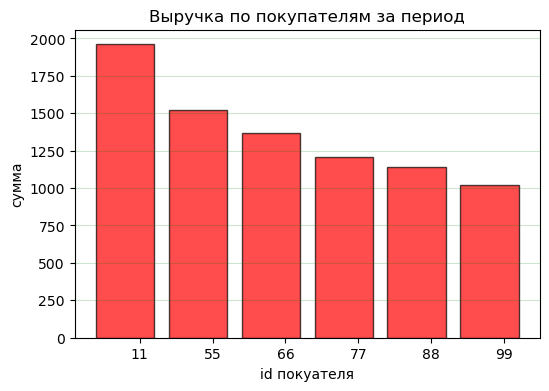

In [50]:
# построим диаграмму с выручкой по покупателям
import matplotlib.pyplot as plt
import numpy as np 
plt.figure(figsize=(6, 4))
   
X_axis = np.arange(len(df_grouped.id_customer)) 
  
plt.bar(X_axis - 0.2, df_grouped.total_amount.sort_values(ascending=False), alpha= 0.7, edgecolor='black', color = 'red') 
   
plt.xticks(X_axis, df_grouped.id_customer) 
plt.grid(axis = 'y', alpha = 0.2, color = 'green')
plt.xlabel("id покуателя") 
plt.ylabel("сумма") 
plt.title("Выручка по покупателям за период") 
plt.show()